# №7.0
Определить устойчивость замкнутой автоматической системы, содержащей неустойчивое звено, по критерию Найквиста, если передаточная функция её в разомкнутом состоянии имеет вид:
$$W(s) = \frac{k(1 + T_2s)}{s(1 + T_1s)(-1 + T_3s)}$$
А параметры ее имеют значения $T_1 = 0.01~c,~T_2 = 0.1~c,~T_3 = 0.05~c,~k = 20~\frac{1}{c}$.

In [1]:
import numpy, matplotlib.pyplot # Подключаем модули расширенной работы с математикой и построения графиков

In [2]:
T1 = 0.01; T2 = 0.1; T3 = 0.05; k = 20;

I вариант. Воспользуемся готовыми средствами (модуль control для Python):

In [3]:
import control

W = control.tf([T2*k, k], [T1*T3,  T3 - T1,  -1,  0]) # Определим передаточную функцию

print(W)


        2 s + 20
-------------------------
0.0005 s^3 + 0.04 s^2 - s



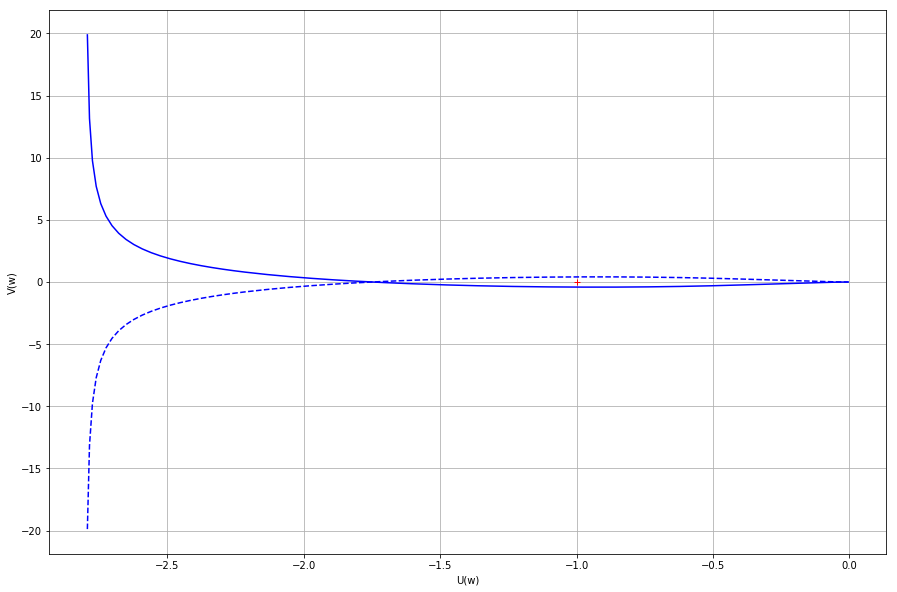

In [4]:
matplotlib.pyplot.figure(figsize=(15, 10)) # размеры графика
control.nyquist(W, omega=numpy.arange(1, 1000, 0.5)) # Построим годограф Найквиста системы
matplotlib.pyplot.grid(True) # сетка
matplotlib.pyplot.axis('tight') # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #
matplotlib.pyplot.show()

II вариант. Построим годограф Найквиста, воспользовавшись только средствами Python.

In [5]:
def W(s):                                             # Определим передаточную функцию
    return k*(1 + T2*s)/(s*(1 + T1*s)*(-1 + T3*s))    #

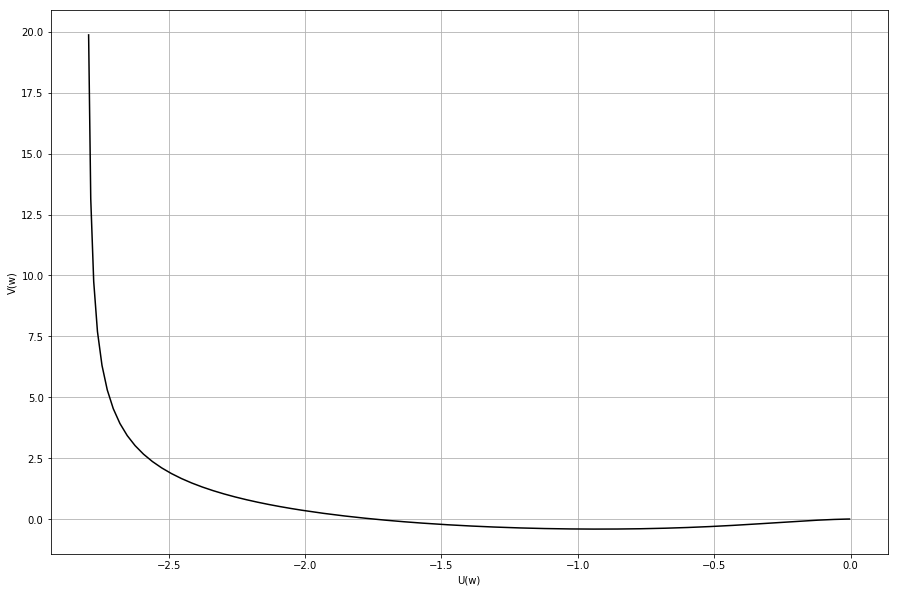

In [6]:
a = numpy.array([W(1j*omega) for omega in numpy.arange(1, 1000, 0.5)]) # массив точек для годографа Найквиста

matplotlib.pyplot.figure(figsize=(15, 10)) # размеры графика
matplotlib.pyplot.plot(a.real, a.imag, 'k') # годограф Найквиста
matplotlib.pyplot.grid(True) # сетка
matplotlib.pyplot.axis('tight') # масштаб
matplotlib.pyplot.xlabel('U(w)') # оси
matplotlib.pyplot.ylabel('V(w)') #

matplotlib.pyplot.show()

**Заметка.** На обоих годографах видно, что:
$$U(\omega) = \Re{W(i\omega)} = -\frac{k(-T_1 + T_2 + T_3 +T_1T_2T_3\omega^2)}{(1 + T_1^2\omega^2)(1 + T_3^2\omega^2)}$$
$$U(0) = -k(-T_1 + T_2 + T_3) = -2.8$$

По критерию Найквиста, система **неустойчива**. Подробнее рассмотрим поведение $\arg{W(i\omega)}$ при $\omega \longrightarrow 0$